In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
print("Columns:", df.columns)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

Columns: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Missing values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Data types:
 age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium               

In [4]:
if df.columns[0] == df.iloc[0][0]:
    df = df[1:]

C:\Users\User\AppData\Local\Temp\ipykernel_10364\1122294942.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.columns[0] == df.iloc[0][0]:


In [5]:
df = df.apply(pd.to_numeric, errors='coerce')

In [6]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.std()

1.0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model1.predict(X_test)

In [11]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[33  2]
 [13 12]]


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [13]:
print("Accuracy Score for Random forest:", accuracy_score(y_test, y_pred))

Accuracy Score for Random forest: 0.75


In [14]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [15]:
if df.columns[0] == df.iloc[0][0]:
    df = df[1:]

C:\Users\User\AppData\Local\Temp\ipykernel_10364\1122294942.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.columns[0] == df.iloc[0][0]:


In [16]:
df = df.apply(pd.to_numeric, errors='coerce')

In [17]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
modelLRegression = LogisticRegression()
modelLRegression.fit(X, y)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# ACCURACY OF LOGISTIC REGRESSION IS GREATER THAN 80%

In [20]:
y_pred = modelLRegression.predict(X_test)
print("Accuracy for Logistic Regression: ", accuracy_score(y_test, y_pred))

Accuracy for Logistic Regression:  0.8166666666666667


# CHOOSING LOGISTIC REGRESSION MODEL AS IT HAS SATISFIED THE CRITERIA STATED FOR THE PROJECT

In [21]:
import joblib
joblib.dump(modelLRegression, 'model.pkl')

['model.pkl']

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [23]:
base_learners = [
    ('svm', SVC(probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

meta_model = LogisticRegression()
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stack_model.fit(X_train, y_train)

preds = stack_model.predict(X_test)
print("Stacking Accuracy: ", accuracy_score(y_test, preds))

Stacking Accuracy:  0.5833333333333334


# DEEP LEARNING 

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [25]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [26]:
# 2. Clean data
if df.columns[0] == df.iloc[0][0]:
    df = df[1:]
df = df.apply(pd.to_numeric, errors='coerce')

C:\Users\User\AppData\Local\Temp\ipykernel_10364\3875952973.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.columns[0] == df.iloc[0][0]:


In [27]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(62, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='softmax'))

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100


c:\Users\User\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2910 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.0000e+00
Epoch 2/100
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4500 - loss: 0.0000e+00

c:\Users\User\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (20, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(20, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3219 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.0000e+00
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2936 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.0000e+00
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3049 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.0000e+00
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3102 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.0000e+00
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2713 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.0000e+00
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2710 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.0000e+00
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2789 - loss: 0.0000e+00 - val_accuracy: 0.4167 - val_loss: 0.0000e+00
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.30

In [55]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\User\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [56]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 0 35]
 [ 0 25]]


In [57]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.42      1.00      0.59        25

    accuracy                           0.42        60
   macro avg       0.21      0.50      0.29        60
weighted avg       0.17      0.42      0.25        60



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.4166666666666667


In [59]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

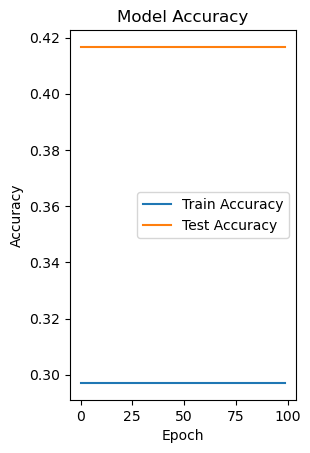

In [60]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

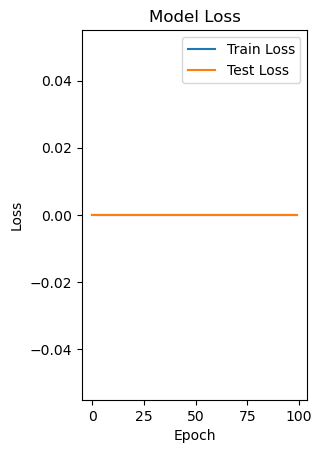

In [61]:

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [62]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# ENSEMBLE ================================================

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [65]:
if df.columns[0] == df.iloc[0][0]:
    df = df[1:]
df = df.apply(pd.to_numeric, errors='coerce')

C:\Users\User\AppData\Local\Temp\ipykernel_10364\2110366194.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.columns[0] == df.iloc[0][0]:


In [66]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# 5. Scale features (important for LR and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# 6. Define individual models
log_reg = LogisticRegression(class_weight='balanced')
svm = SVC(probability=True, class_weight='balanced')  # Needed for soft voting
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [69]:
# 7. Ensemble (Voting Classifier)
ensemble = VotingClassifier(
    estimators=[('lr', log_reg), ('svm', svm), ('rf', rf)],
    voting='soft' , # Soft voting uses predicted probabilities
    weights=[1, 1, 2]  # Equal weights for all models
)

In [70]:
# 8. Fit ensemble model
ensemble.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced')),
                             ('svm',
                              SVC(class_weight='balanced', probability=True)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42))],
                 voting='soft', weights=[1, 1, 2])

In [71]:
# 9. Evaluate ensemble
y_pred = ensemble.predict(X_test_scaled)

In [72]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[31  4]
 [10 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.79      0.60      0.68        25

    accuracy                           0.77        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.77      0.77      0.76        60

Ensemble Accuracy: 0.7666666666666667
